In [1]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential,model_from_json

from keras.layers import Dense

import pylab as plt

import keras

from keras.datasets import mnist

import warnings

warnings.filterwarnings('ignore')

#CNN

###Data

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train.shape,y_test.shape)

((60000, 28, 28), (10000,))

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
#x_train

In [7]:
x_train=x_train.reshape(60000,784)

x_test=x_test.reshape(10000,784)

In [8]:
df=pd.DataFrame(x_train)

df.columns


RangeIndex(start=0, stop=784, step=1)

In [9]:
df.iloc[50,:].unique()

array([  0,  12,  56, 140, 126, 175, 200,  96,   2,  35, 166, 238, 254,
       246, 242, 253,  67, 184, 182, 146, 127,  70,  30,  45,  36, 215,
       207,  14,  55, 251, 169,   1,  11, 232,  20, 190, 250,  61,  24,
       118, 206, 248, 142, 108,  18,  63, 223, 209,  52, 174, 129,  95,
        16, 106, 249, 125, 179, 239,  80, 244, 100, 234,   4,   5,   3,
       150,  64, 181,  38,  34, 188, 226, 255,  88,  68, 128, 157,  23,
       210, 187,  49,  41, 229,  91], dtype=uint8)

In [10]:
df.iloc[:,50].unique()


array([  0, 142, 141,  21, 184, 117], dtype=uint8)

In [11]:
x_train=x_train.astype('float32')

x_test=x_test.astype('float32')

In [12]:
#Normalize

from sklearn.preprocessing import MinMaxScaler

scal=MinMaxScaler()

x_train=scal.fit_transform(x_train)

x_test=scal.transform(x_test)

In [13]:
# check that scalar is working

df1=pd.DataFrame(x_train)

df1.iloc[50,:].unique() # its work check 13th value is 254 to 0.9960785 max is 255

array([0.        , 0.04705883, 0.21960786, 0.54901963, 0.49411768,
       0.6862745 , 0.7843138 , 0.37647063, 0.00784314, 0.13725491,
       0.6509804 , 0.9333334 , 0.9960785 , 0.96470594, 0.9490197 ,
       0.9921569 , 0.2627451 , 0.72156864, 0.7137255 , 0.57254905,
       0.49803925, 0.27450982, 0.11764707, 0.1764706 , 0.14117648,
       0.8431373 , 0.8117648 , 0.05490196, 0.21568629, 0.9843138 ,
       0.6627451 , 0.00392157, 0.04313726, 0.909804  , 0.07843138,
       0.74509805, 0.9803922 , 0.2392157 , 0.09411766, 0.46274513,
       0.8078432 , 0.9725491 , 0.5568628 , 0.42352945, 0.07058824,
       0.24705884, 0.8745099 , 0.8196079 , 0.20392159, 0.68235296,
       0.5058824 , 0.37254903, 0.0627451 , 0.4156863 , 0.97647065,
       0.4901961 , 0.7019608 , 0.93725497, 0.3137255 , 0.9568628 ,
       0.3921569 , 0.9176471 , 0.01568628, 0.01960784, 0.01176471,
       0.5882353 , 0.2509804 , 0.70980394, 0.14901961, 0.13333334,
       0.7372549 , 0.8862746 , 1.        , 0.34509805, 0.26666

In [14]:
print(x_train.shape[0],"Training samples")

print("also we have",x_test.shape[0],"Test samples ")


60000 Training samples
also we have 10000 Test samples 


In [15]:
y_train=keras.utils.to_categorical(y_train,num_classes=10)

y_test=keras.utils.to_categorical(y_test,num_classes=10)

In [16]:

df2=pd.DataFrame(y_train)

df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Label is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(close=None, block=None)>

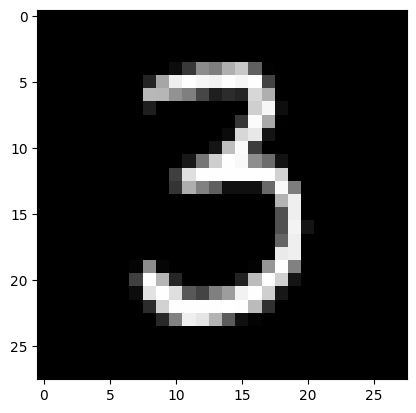

In [17]:
print("Label is",y_train[50])

plt.imshow(x_train[50].reshape(28,28),cmap='gray')

plt.show

###Model

In [18]:
batch_size=138

epacs=8

In [19]:
model=Sequential()

first_hiden_layersize=32 #size is your wise

num_class=10 #No of your label

model.add(Dense(first_hiden_layersize,activation='relu',input_shape=(784,)))

model.add(Dense(32,activation='relu'))

model.add(Dense(32,activation='sigmoid'))

model.add(Dense(num_class,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


shape of first layer (784, 32)
visuvalation of first layer


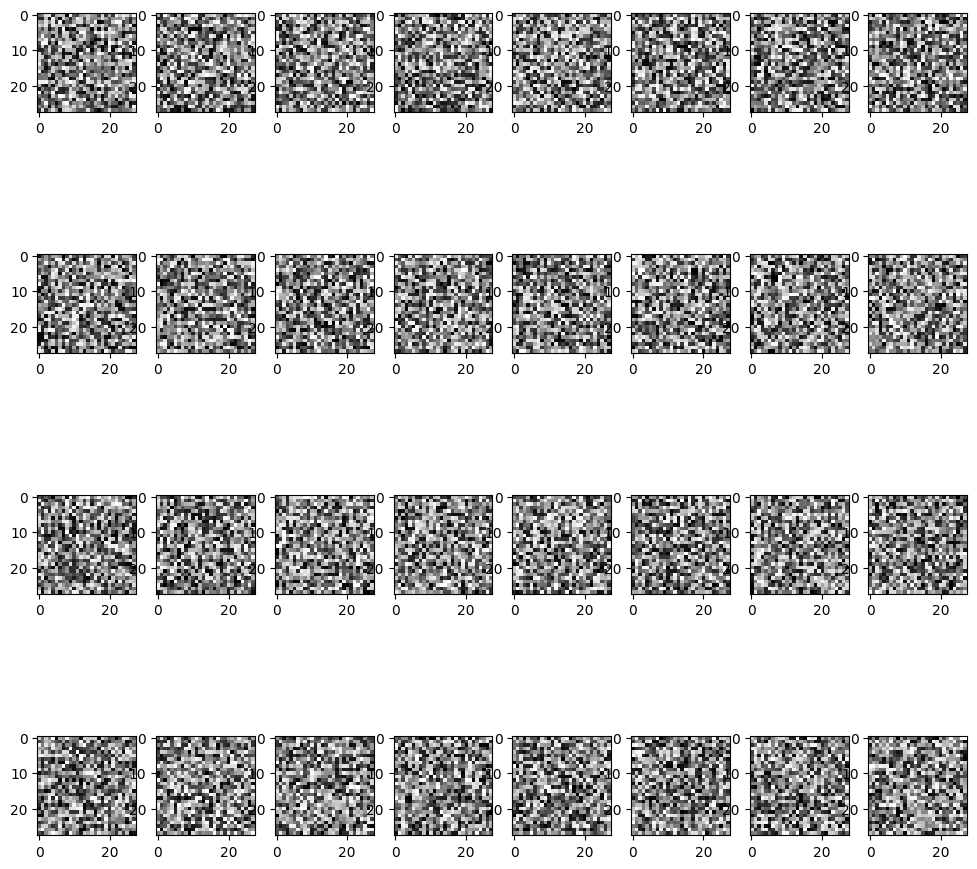

In [21]:

w=[]

for layer in model.layers:

  weights=layer.get_weights()

  w.append(weights)

layer1=np.array(w[0][0])

print("shape of first layer",layer1.shape)

print("visuvalation of first layer")

fig=plt.figure(figsize=(12,12))

columns=8

rows=int(first_hiden_layersize/8)

for i in range(1, columns*rows +1):

  fig.add_subplot(rows,columns,i)

  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')

plt.show()

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epacs,verbose=1)

Epoch 1/8
435/435 [==============================] - 3s 5ms/step - loss: 0.8126 - accuracy: 0.8165
Epoch 2/8
435/435 [==============================] - 4s 10ms/step - loss: 0.2855 - accuracy: 0.9261
Epoch 3/8
435/435 [==============================] - 2s 6ms/step - loss: 0.2110 - accuracy: 0.9419
Epoch 4/8
435/435 [==============================] - 2s 5ms/step - loss: 0.1731 - accuracy: 0.9513
Epoch 5/8
435/435 [==============================] - 2s 6ms/step - loss: 0.1492 - accuracy: 0.9572
Epoch 6/8
435/435 [==============================] - 2s 6ms/step - loss: 0.1295 - accuracy: 0.9631
Epoch 7/8
435/435 [==============================] - 4s 9ms/step - loss: 0.1156 - accuracy: 0.9666
Epoch 8/8
435/435 [==============================] - 3s 7ms/step - loss: 0.1040 - accuracy: 0.9699


In [24]:
score=model.evaluate(x_test,y_test,verbose=0)

print("Test loss is",score[0])

print("Test accuracy is",score[1])

Test loss is 0.12165658175945282
Test accuracy is 0.9631999731063843


shape of first layer (784, 32)
visuvalation of first layer


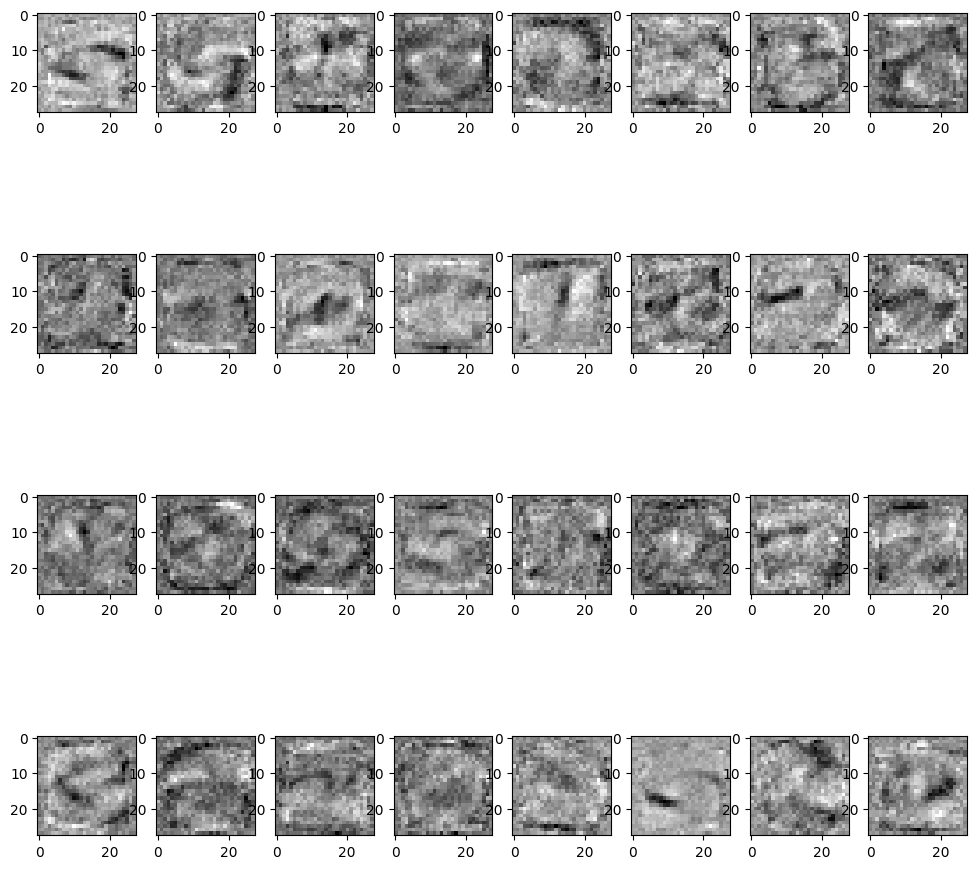

In [25]:


w=[]

for layer in model.layers:

  weights=layer.get_weights()

  w.append(weights)

layer1=np.array(w[0][0])

print("shape of first layer",layer1.shape)

print("visuvalation of first layer")

fig=plt.figure(figsize=(12,12))

columns=8

rows=int(first_hiden_layersize/8)

for i in range(1, columns*rows +1):

  fig.add_subplot(rows,columns,i)

  plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')

plt.show()

###Prediction


In [26]:
prediction=model.predict(x_test[50:51])

prediction=prediction[0]

print("Predcion is ",prediction)

print("Threshold prediction is",(prediction>0.5)*1)

1/1 [==============================] - 0s 96ms/step
Predcion is  [2.0847318e-03 2.9306117e-04 6.6974596e-04 8.6288019e-05 6.4736174e-04
 3.3117714e-03 9.9245620e-01 9.8129458e-06 3.8783348e-04 5.3157513e-05]
Threshold prediction is [0 0 0 0 0 0 1 0 0 0]


In [27]:
sum(prediction)

0.9999999618230504

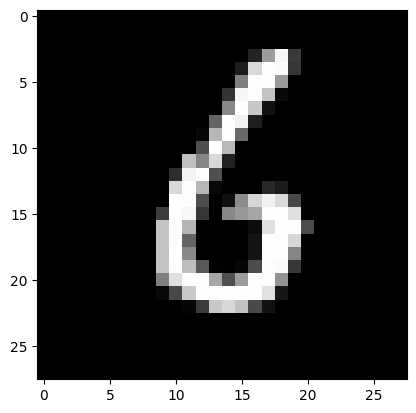

In [28]:
plt.imshow(x_test[50:51].reshape(28,28),cmap='gray')

plt.show()

In [29]:
df_a=pd.DataFrame(y_train)

df_a.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:

df_4=df_a[df_a.iloc[:,4]==1]

df_4.index #this is image 4 index

Int64Index([    2,     9,    20,    26,    53,    58,    60,    61,    64,
               89,
            ...
            59900, 59905, 59915, 59922, 59931, 59933, 59941, 59943, 59951,
            59975],
           dtype='int64', length=5842)

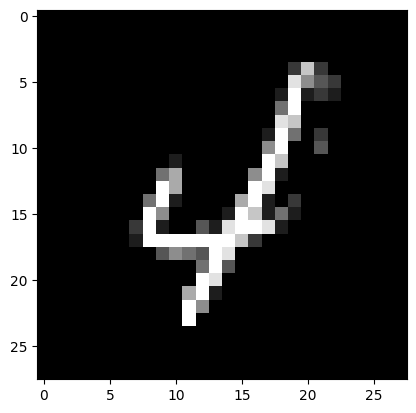

In [31]:
plt.imshow(x_train[59975].reshape(28,28),cmap='gray')

plt.show()

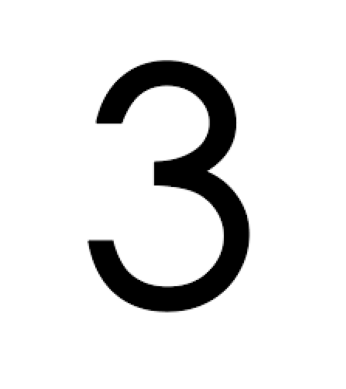

In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr=cv2.imread('/content/three.png',cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb),plt.axis('off')
plt.show()

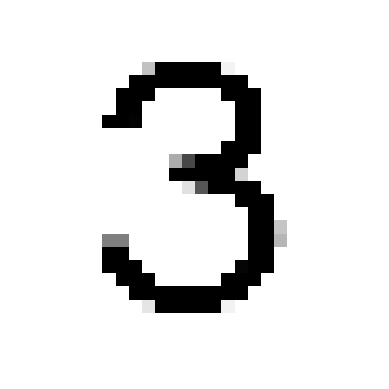

In [109]:
image=cv2.imread('/content/three.png',cv2.IMREAD_GRAYSCALE)

image_resize=cv2.resize(image,(28,28))

plt.imshow(image_resize,cmap='gray'),plt.axis("off")

plt.show()

In [110]:
predic=model.predict(image_resize.reshape(1,784))

print("predict score:",predic[0])

thres=(predic>0.5)*1

print("Threshould score is :",thres[0])

print("predict values is :",np.where(thres==1)[1])

1/1 [==============================] - 0s 20ms/step
predict score: [9.4683457e-04 7.6965038e-03 2.7429955e-02 8.7616134e-01 7.6680764e-05
 7.8943700e-02 3.9679365e-04 1.9895937e-03 6.0872855e-03 2.7129205e-04]
Threshould score is : [0 0 0 1 0 0 0 0 0 0]
predict values is : [3]


###Save Model

In [68]:
model_json=model.to_json()

with open("model.json","w") as json_file:

  json_file.write(model_json)
  model.save_weights("model.h5")

print("Saved model to disk")

Saved model to disk


In [69]:

json_file=open('model.json','r')

loaded_model_json=json_file.read()

json_file.close()

loaded_model=model_from_json(loaded_model_json)

In [70]:
#loaded weight

loaded_model.load_weights("model.h5")

print("loaded model from disk")

loaded model from disk


In [71]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Retrain model

In [72]:
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=loaded_model.fit(x_train,y_train,batch_size=1,epochs=2,verbose=1,validation_data=(x_test,y_test))

score=loaded_model.evaluate(x_test,y_test)

print("Test loss:",score[0])

print("Test accuracy:",score[1])


Epoch 1/2
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1927 - accuracy: 0.9425 - val_loss: 0.1687 - val_accuracy: 0.9533
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.1981 - accuracy: 0.9465
Test loss: 0.19811758399009705
Test accuracy: 0.9465000033378601


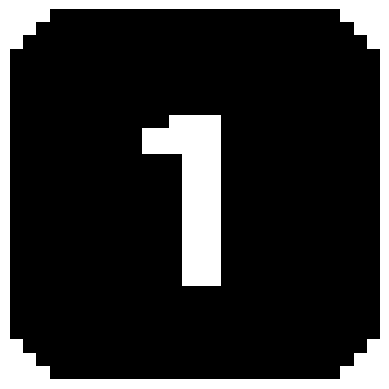

In [147]:
image1=cv2.imread('/content/num.png',cv2.IMREAD_GRAYSCALE)

image_resize1=cv2.resize(image1,(28,28))

plt.imshow(image_resize1,cmap='gray'),plt.axis("off")

plt.show()

In [148]:
predic1=loaded_model.predict(image_resize1.reshape(1,784))

print("predict score:",predic1[0])

thres1=(predic1>0.5)*1

print("Threshould score is :",thres1[0])

print("predict values is :",np.where(thres1==1)[1])

1/1 [==============================] - 0s 21ms/step
predict score: [6.1190285e-08 9.9826604e-01 4.6444137e-04 1.1176232e-04 5.7541612e-05
 7.7039995e-06 6.0516714e-07 1.0066463e-03 5.7093279e-05 2.8077608e-05]
Threshould score is : [0 1 0 0 0 0 0 0 0 0]
predict values is : [1]



#Auto Encoder


In [76]:
from keras.models import Model

from keras.layers import Dense, Input

In [77]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #np.prod = Return the product of array elements over a given axis.

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)

print(x_test.shape)

(60000, 784)
(10000, 784)


In [78]:
x_test[0].shape


(784,)

In [79]:
# Hyper parameters

batch_size = 128

nb_epoch = 5

In [80]:

# Parameters for MNIST dataset

img_rows, img_cols = 28, 28


In [81]:

# Parameters for denoising autoencoder

nb_visible = img_rows * img_cols

nb_hidden = 16

In [82]:

# Build autoencoder model

input_img = Input(shape=(nb_visible,))

encoded = Dense(nb_hidden, activation='relu')(input_img)

decoded = Dense(nb_visible, activation='sigmoid')(encoded)

In [83]:
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25888 (101.12 KB)
Trainable params: 25888 (101.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,

        validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2579 - val_loss: 0.1857
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1683 - val_loss: 0.1534
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1491 - val_loss: 0.1431
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1422 - val_loss: 0.1385
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1384 - val_loss: 0.1355


In [85]:

# Evaluate

evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)

print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 3ms/step - loss: 0.1355

Summary: Loss over the test dataset: 0.14


In [86]:

# Decode test images

decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


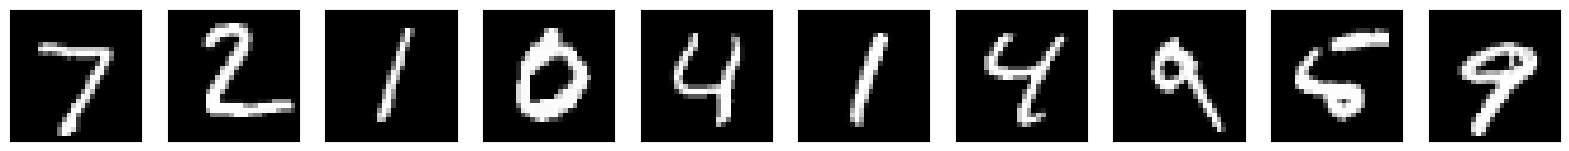

In [87]:
n = 10 # how many digits we will display

plt.figure(figsize=(20, 4))

for i in range(n):

  # display original

  ax = plt.subplot(2, n, i + 1)

  plt.imshow(x_test[i].reshape(28, 28))

  plt.gray()

  ax.get_xaxis().set_visible(False)

  ax.get_yaxis().set_visible(False)

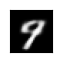

In [89]:

  # display reconstruction

  ax = plt.subplot(2, n, i + 1 + n)

  plt.imshow(decoded_imgs[i].reshape(28, 28))

  plt.gray()

  ax.get_xaxis().set_visible(False)

  ax.get_yaxis().set_visible(False)

plt.show()

## Denoising Autoencoder

In [90]:

norm_dist=np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) # loc=mean scale=std.dev

norm_dist_test=np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

norm_dist.shape

(60000, 784)

In [91]:
# Add random noise

corruption_level = 0.3

In [92]:
x_train_noisy = x_train + corruption_level * norm_dist

x_test_noisy = x_test + corruption_level * norm_dist_test

x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)

print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [93]:


# Hyper parameters

batch_size = 128

epochs = 5

In [94]:

# Parameters for MNIST dataset

img_rows, img_cols = 28, 28

In [95]:
# Parameters for denoising autoencoder

nb_visible = img_rows * img_cols

nb_hidden = 32

In [96]:

# Build autoencoder model

input_img = Input(shape=(nb_visible,))

encoded = Dense(nb_hidden, activation='relu')(input_img)

decoded = Dense(nb_visible, activation='sigmoid')(encoded)

In [97]:

autoencoder = Model(input_img,decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:

# Train

autoencoder.fit(x_train_noisy, x_train,epochs=epochs, batch_size=batch_size, shuffle=True, verbose=1,validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2310 - val_loss: 0.1690
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1530 - val_loss: 0.1369
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1301 - val_loss: 0.1219
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1191 - val_loss: 0.1134
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1131 - val_loss: 0.1105


In [99]:


# Evaluate

evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)

print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 3ms/step - loss: 0.1105

Summary: Loss over the test dataset: 0.11


In [100]:
import matplotlib.pyplot as plt

%matplotlib inline

In [101]:

# Decode test images

decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


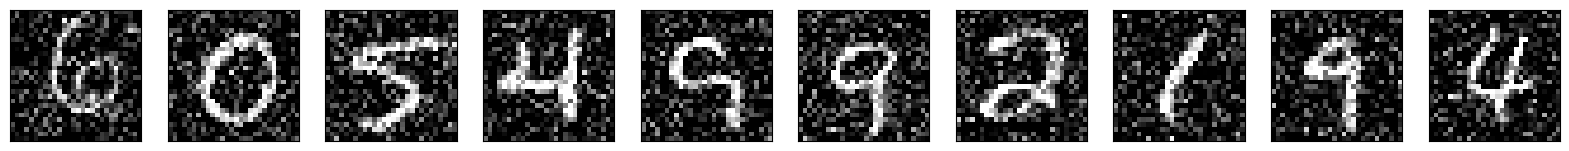

In [102]:
n = 10 # how many digits we will display

plt.figure(figsize=(20, 4))

for i in range(100,110):

  # display original

  ax = plt.subplot(2, n, i-100 + 1)

  plt.imshow(x_test_noisy[i].reshape(28, 28))

  plt.gray()

  ax.get_xaxis().set_visible(False)

  ax.get_yaxis().set_visible(False)


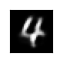

In [103]:

  # display reconstruction

  ax = plt.subplot(2, n, i + 1 + n-100)

  plt.imshow(decoded_imgs[i].reshape(28, 28))

  plt.gray()

  ax.get_xaxis().set_visible(False)

  ax.get_yaxis().set_visible(False)

plt.show()